# Part I: *Data Analysis and Preprocessing*

## A. Data Manipulation

#### a. Import, visualize, and save the contents of a dataset.

##### *algerian soil props*

In [46]:
import pandas as pd
import numpy as np
import io

df = pd.read_excel('../Data/soil_dz_allprops.xlsx')

# buffer = io.StringIO()
# df.info(show_counts=True, verbose=True, buf=buffer)
df.info(show_counts=True, verbose=True)
# s = buffer.getvalue()
# with open('./files/soil_dz_attributs_infos.txt', 'w') as f:
#     f.write(s)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CNT_FULLNAME      295 non-null    object 
 1   sand % topsoil    295 non-null    float64
 2   sand % subsoil    295 non-null    float64
 3   silt % topsoil    295 non-null    float64
 4   silt% subsoil     295 non-null    float64
 5   clay % topsoil    295 non-null    float64
 6   clay % subsoil    295 non-null    float64
 7   pH water topsoil  295 non-null    float64
 8   pH water subsoil  295 non-null    float64
 9   OC % topsoil      295 non-null    float64
 10  OC % subsoil      295 non-null    float64
 11  N % topsoil       295 non-null    float64
 12  N % subsoil       295 non-null    float64
 13  BS % topsoil      295 non-null    float64
 14  BS % subsoil      295 non-null    float64
 15  CEC topsoil       295 non-null    float64
 16  CEC subsoil       295 non-null    float64
 1

In [48]:
pd.set_option('display.max_columns', None)
df_no_geometry = df.drop('geometry', axis=1) 
df_no_geometry.head()

CNT_FULLNAME  sand % topsoil  sand % subsoil  silt % topsoil  silt% subsoil  \
0      ALGERIA           49.57           43.09          28.200         24.200   
1      ALGERIA           56.97           55.06          21.440         19.190   
2      ALGERIA           57.39           55.21          24.315         22.825   
3      ALGERIA           20.41           24.08          32.930         29.190   
4      ALGERIA           31.42           28.46          21.650         20.520   

   clay % topsoil  clay % subsoil  pH water topsoil  pH water subsoil  \
0          22.230          32.710              5.86              5.39   
1          21.690          25.680              5.92              6.02   
2          18.295          21.965              6.27              5.75   
3          46.620          46.690              7.86              8.03   
4          46.890          50.950              7.32              7.49   

   OC % topsoil  OC % subsoil  N % topsoil  N % subsoil  BS % topsoil  \
0        2.4110        0.7420       0.1150        0.061          72.5   
1        1.0460        0.5500       0.1150        0.071          81.0   
2        1.2295        0.3905       0.0565        0.028          69.9   
3        0.6790        0.3820       0.0870        0.048          98.6   
4        0.6190        0.4240       0.0870        0.057          92.9   

   BS % subsoil  CEC topsoil  CEC subsoil  CEC clay topsoil  CEC Clay subsoil  \
0          63.2         6.89       12.420             21.50              35.8   
1          81.7        15.00       17.380             66.50              61.4   
2          53.5         8.08        8.325             20.45              26.1   
3          99.3        39.48       37.910             74.20              71.0   
4          93.6        36.42       36.980             72.10              69.8   

   CaCO3 % topsoil  CaCO3 % subsoil  BD topsoil  BD subsoil  C/N topsoil  \
0            0.030            0.090        1.78        1.78         20.8   
1            0.760            0.830        1.19        1.32          9.7   
2            0.035            0.035        1.69        1.69         18.7   
3            6.330            6.770        1.54        1.58          9.3   
4            1.950            2.720        1.54        1.67          9.0   

   C/N subsoil  
0         12.1  
1          8.0  
2         13.0  
3          9.6  
4          8.7

##### *wilayas' polygons data*

POLYGON ((4.0338395 36.9000698, 4.0348995 36.8999926, 4.0354467 36.9001153, 4.0350454 36.9003242, 4.0353512 36.9005353, 4.0354371 36.9009111, 4.0354478 36.9012199, 4.035951 36.9012585, 4.0362521 36.9009476, 4.0369737 36.9009992, 4.037689 36.9004057, 4.038879 36.8999549, 4.040287 36.9002208, 4.0406125 36.9003656, 4.0411115 36.9004838, 4.0412193 36.9007219, 4.0414431 36.9007952, 4.0422552 36.9004662, 4.0426618 36.9001373, 4.0428507 36.8998206, 4.0426007 36.899471, 4.0438849 36.8988768, 4.0445769 36.898613, 4.0459835 36.8981737, 4.0466272 36.8979335, 4.0476465 36.8975667, 4.0485359 36.8971119, 4.0508973 36.8977649, 4.0519927 36.8978811, 4.0523065 36.8978498, 4.0527152 36.8980198, 4.053086 36.8981741, 4.0534761 36.8980083, 4.0538574 36.8981102, 4.0550815 36.8979408, 4.0559796 36.8989918, 4.0562821 36.8989493, 4.055886 36.8992551, 4.0558943 36.8993723, 4.0578378 36.8987245, 4.0584386 36.898501, 4.0588141 36.8983299, 4.0588442 36.8982222, 4.058366 36.8981131, 4.05815 36.8978738, 4.0583588 36

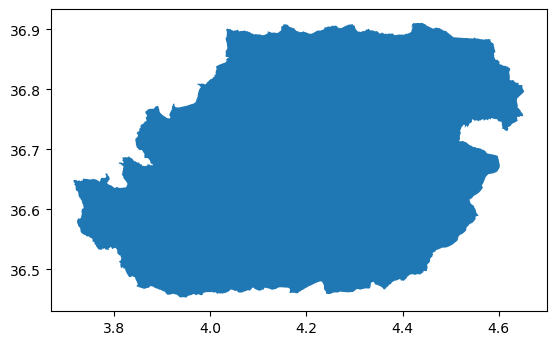

In [4]:
import geopandas as geopd

geodf = geopd.read_file(filename='../Data/wilayas/all-wilayas.shp')

geodf = geodf.drop(['name_ar', 'name_ber'], axis=1)
geodf.head(58)

tizi = geodf.loc[geodf['name'] == 'Tizi Ouzou']
tizi.head()

geo_tizi = tizi['geometry'].iloc[0]

tizi.plot()

print(type(geo_tizi))

#### b. Provide a global description of the dataset.

#### c. Update/Delete an instance or value of the dataset.

## B. Analysis of characteristics 

#### a. Foreach attribute:

##### i. Calculate measures of central tendency and deduce symmetries

##### ii. Calculate measures of dispersion and deduce outliers

##### iii. Calculate the amount of missing values and unique values

##### iv. Construct boxplots and display outliers


##### v. Construct histograms and visualize the data distribution

#### b. Construct and display scatter plots of the data and deduce correlations

# INTERFACE

## C. Datareduction through aggregation by seasons

## D. Dataintegration: merges data from multiple sources into a single coherent dataset

## E. Multiple choices of handling outliers and missing values

## F. Datanormalization: Min-Max / z-score methods

## G. Datareduction via discretization of continuous data: Equal Frequency / Amplitude

## H. Datareduction (elimination of redundancies) horizontal / vertical